In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # 경고 무시

from matplotlib import rc
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

sns.set_palette('pastel')

In [1]:
# 네비게이션 데이터 경로 설정
filepath = '/Users/SOOMIN/데분프/팀플/data'
filelist = os.listdir(filepath)

# 충청남도 산업체

In [2]:
fn_1 = '충남.xlsx'
df_1 = pd.read_excel(filepath + '/' + fn_1)
df_1

,행정구역별,산업별,사업체구분별,2020,2020.1
0,행정구역별,산업별,사업체구분별,사업체수 (개),종사자수 (명)
1,충남,전체 산업,계,184103,937082
2,NaN,NaN,단독사업체,171858,626325
3,NaN,NaN,"본사,본점 등",2623,97979
4,NaN,NaN,"공장,지사(점),영업소",9622,212778
...,...,...,...,...,...
76,NaN,NaN,"공장,지사(점),영업소",67,731
77,NaN,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",계,19620,34734
78,NaN,NaN,단독사업체,18998,32012
79,NaN,NaN,"본사,본점 등",54,408


In [3]:
cn= df_1.dropna(subset=['산업별'])
cn

,행정구역별,산업별,사업체구분별,2020,2020.1
0,행정구역별,산업별,사업체구분별,사업체수 (개),종사자수 (명)
1,충남,전체 산업,계,184103,937082
5,NaN,"농업, 임업 및 어업(01~03)",계,671,5205
9,NaN,광업(05~08),계,84,780
13,NaN,제조업(10~34),계,19478,301104
17,NaN,"전기, 가스, 증기 및 공기조절 공급업(35)",계,310,6996
21,NaN,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39)",계,631,6828
25,NaN,건설업(41~42),계,7791,50846
29,NaN,도매 및 소매업(45~47),계,44714,100615
33,NaN,운수 및 창고업(49~52),계,16127,37870


In [4]:
cn.drop(['행정구역별','사업체구분별'],axis=1)
cn.rename(columns={'2020':'사업체수(개)'},inplace=True)
cn.rename(columns={'2020.1':'종사자수(명)'},inplace=True)

In [5]:
cn=cn.drop([0,1])

In [6]:
cn=cn.fillna('충남')

In [7]:
cn

,행정구역별,산업별,사업체구분별,사업체수(개),종사자수(명)
5,충남,"농업, 임업 및 어업(01~03)",계,671,5205
9,충남,광업(05~08),계,84,780
13,충남,제조업(10~34),계,19478,301104
17,충남,"전기, 가스, 증기 및 공기조절 공급업(35)",계,310,6996
21,충남,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39)",계,631,6828
25,충남,건설업(41~42),계,7791,50846
29,충남,도매 및 소매업(45~47),계,44714,100615
33,충남,운수 및 창고업(49~52),계,16127,37870
37,충남,숙박 및 음식점업(55~56),계,39653,86765
41,충남,정보통신업(58~63),계,964,6237


In [8]:
# 특정 3개의 행을 합쳐서 '관광관련업'이라는 하나의 행으로 만들고 기존의 데이터 프레임에서 삭제
merge_1 = ['숙박 및 음식점업(55~56)', '예술, 스포츠 및 여가관련 서비스업(90~91)', '협회 및 단체, 수리 및 기타 개인 서비스업(94~96)']
cn_filtered = cn[cn['산업별'].isin(merge_1)]
cn_filtered_sum = cn_filtered.groupby('행정구역별').sum().reset_index()
cn_filtered_sum['산업별'] = '관광관련업'
cn = pd.concat([cn[~cn['산업별'].isin(merge_1)], cn_filtered_sum])

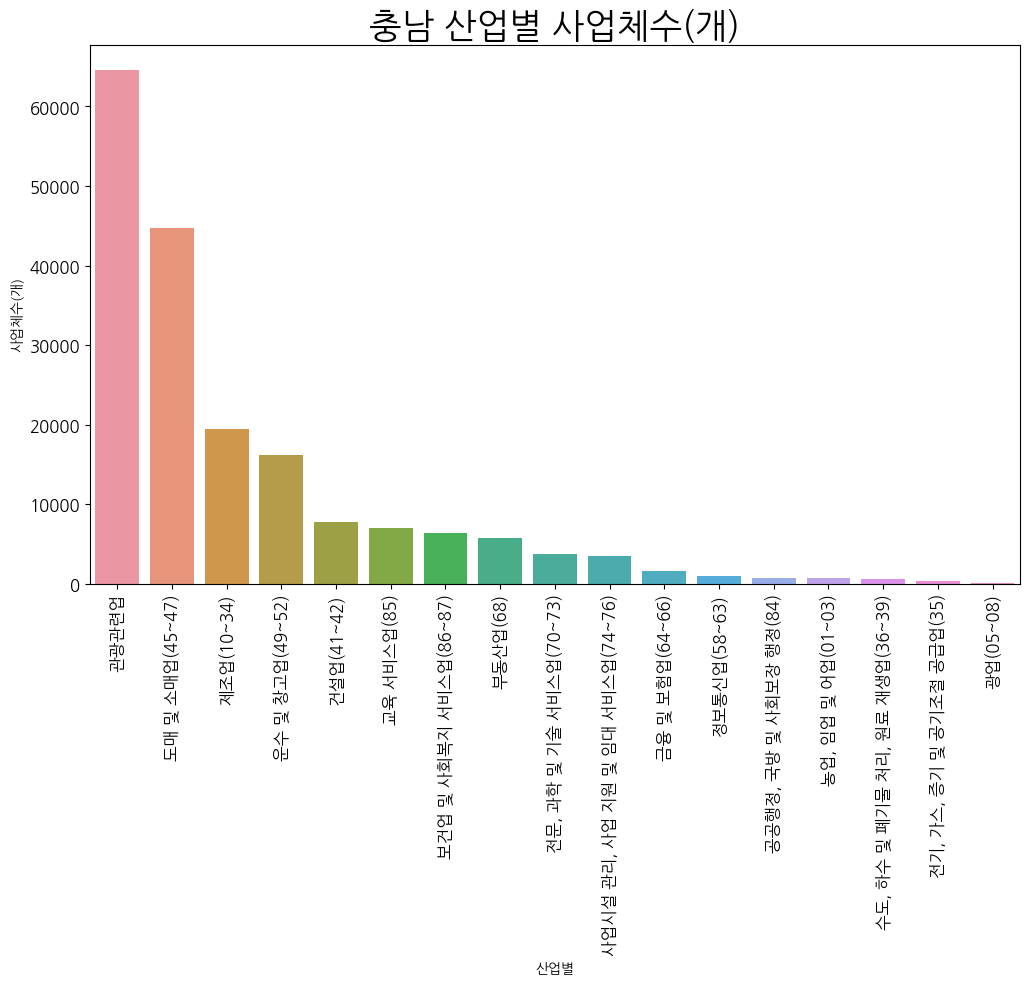

In [9]:
ccn= cn.groupby(['산업별'])[['사업체수(개)']].mean()
ccn.reset_index(drop=False, inplace=True)
ccn.sort_values(by='사업체수(개)', ascending=False, inplace=True)
rcParams['figure.figsize'] = 12,7
sns.barplot(data = ccn,
           x=ccn['산업별'],
           y=ccn['사업체수(개)'])
plt.title('충남 산업별 사업체수(개)', size=25)
plt.xticks(rotation=90,size=12)
plt.yticks(size=12)
y_range = plt.ylim()

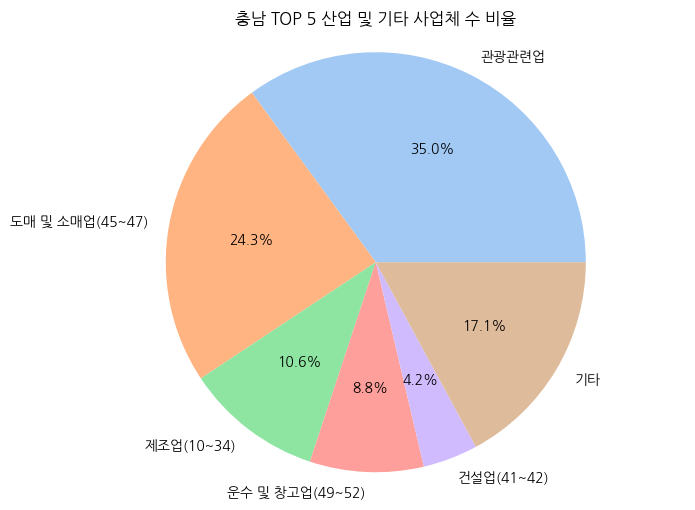

In [10]:
# 데이터프레임에서 '산업별'과 '사업체수(개)' 열 선택
data_1_1 = cn[['산업별', '사업체수(개)']]

# '사업체수(개)' 열을 기준으로 내림차순으로 데이터 정렬
sorted_data_1_1 = data_1_1.sort_values(by='사업체수(개)', ascending=False)

# 상위 다섯 개의 산업을 추출하고 나머지 데이터의 합을 계산
top5_1_1 = sorted_data_1_1.head(5)
etc_1_1 = sorted_data_1_1.iloc[5:]

# 나머지 산업의 합을 계산
etc_sum_1_1 = etc_1_1['사업체수(개)'].sum()

# 파이 차트에 사용할 새로운 데이터프레임을 생성
pie_data_1_1 = pd.concat([top5_1_1, pd.DataFrame([[etc_sum_1_1]], columns=['사업체수(개)'], index=['기타'])])

# '산업별' 열의 '기타' 행 값 설정
pie_data_1_1.at['기타', '산업별'] = '기타'

# '산업별' 열에서 레이블 값 설정
labels_1_1 = pie_data_1_1['산업별']

# 파이 차트
plt.figure(figsize=(8, 6))
plt.pie(pie_data_1_1['사업체수(개)'], labels=labels_1_1, autopct='%1.1f%%')
plt.title('충남 TOP 5 산업 및 기타 사업체 수 비율')
plt.axis('equal')
plt.show()

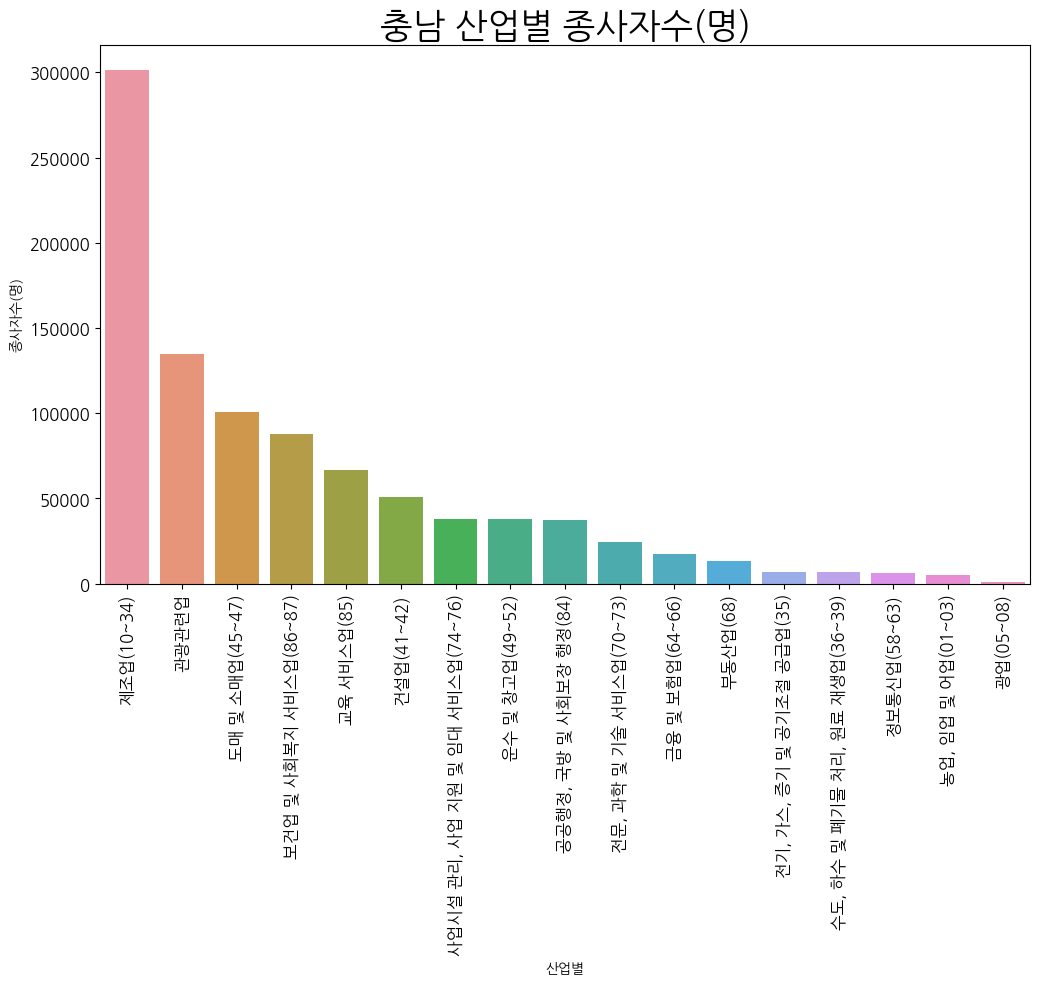

In [11]:
ccn2= cn.groupby(['산업별'])[['종사자수(명)']].mean()
ccn2.reset_index(drop=False, inplace=True)
ccn2.sort_values(by='종사자수(명)', ascending=False, inplace=True)
rcParams['figure.figsize'] = 12,7
sns.barplot(data = ccn2,
           x=ccn2['산업별'],
           y=ccn2['종사자수(명)'])
plt.title('충남 산업별 종사자수(명)', size=25)
plt.xticks(rotation=90,size=12)
plt.yticks(size=12)
plt.show()

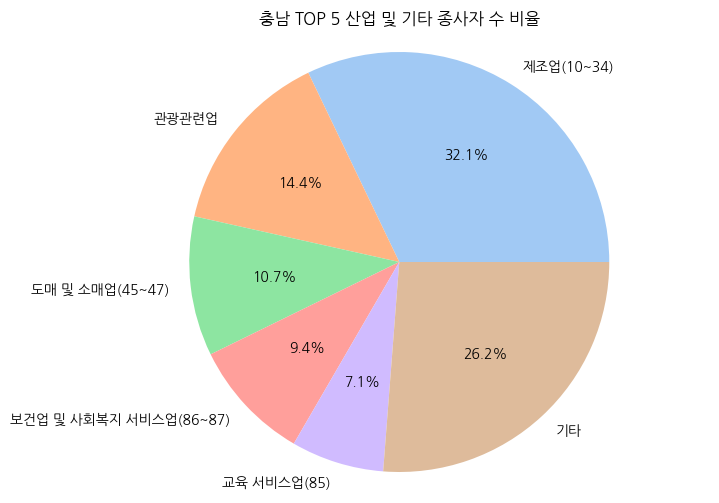

In [12]:
# 데이터프레임에서 '산업별'과 '종사자수(명)' 열 선택
data_1_2 = cn[['산업별', '종사자수(명)']]

# '사업체수(개)' 열을 기준으로 내림차순으로 데이터 정렬
sorted_data_1_2 = data_1_2.sort_values(by='종사자수(명)', ascending=False)

# 상위 다섯 개의 산업을 추출하고 나머지 데이터의 합을 계산
top5_1_2 = sorted_data_1_2.head(5)
etc_1_2 = sorted_data_1_2.iloc[5:]

# 나머지 산업의 합을 계산
etc_sum_1_2 = etc_1_2['종사자수(명)'].sum()

# 파이 차트에 사용할 새로운 데이터프레임을 생성
pie_data_1_2 = pd.concat([top5_1_2, pd.DataFrame([[etc_sum_1_2]], columns=['종사자수(명)'], index=['기타'])])

# '산업별' 열의 '기타' 행 값 설정
pie_data_1_2.at['기타', '산업별'] = '기타'

# '산업별' 열에서 레이블 값 설정
labels_1_2 = pie_data_1_2['산업별']

# 파이 차트
plt.figure(figsize=(8, 6))
plt.pie(pie_data_1_2['종사자수(명)'], labels=labels_1_2, autopct='%1.1f%%')
plt.title('충남 TOP 5 산업 및 기타 종사자 수 비율')
plt.axis('equal')
plt.show()

# 서울 산업체

In [13]:
fn_2 = '서울.xlsx'
df_2 = pd.read_excel(filepath + '/' + fn_2)
df_2

,행정구역별,산업별,사업체구분별,2020,2020.1
0,행정구역별,산업별,사업체구분별,사업체수 (개),종사자수 (명)
1,서울,전체 산업,계,1211053,5868926
2,NaN,NaN,단독사업체,1127404,3716641
3,NaN,NaN,"본사,본점 등",25638,1316981
4,NaN,NaN,"공장,지사(점),영업소",58011,835304
...,...,...,...,...,...
75,NaN,NaN,"공장,지사(점),영업소",1163,14620
76,NaN,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",계,80470,195171
77,NaN,NaN,단독사업체,77542,158198
78,NaN,NaN,"본사,본점 등",876,17067


In [14]:
se=df_2.dropna(subset=['산업별'])
se.drop(['행정구역별','사업체구분별'],axis=1)
se.rename(columns={'2020':'사업체수(개)'},inplace=True)
se.rename(columns={'2020.1':'종사자수(명)'},inplace=True)

In [15]:
se=se.drop([0,1])

In [16]:
se=se.fillna('서울')
se

,행정구역별,산업별,사업체구분별,사업체수(개),종사자수(명)
5,서울,"농업, 임업 및 어업(01~03)",계,170,835
9,서울,광업(05~08),계,25,94
12,서울,제조업(10~34),계,78642,284356
16,서울,"전기, 가스, 증기 및 공기조절 공급업(35)",계,824,6841
20,서울,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39)",계,728,10342
24,서울,건설업(41~42),계,67598,515446
28,서울,도매 및 소매업(45~47),계,352424,1043507
32,서울,운수 및 창고업(49~52),계,105405,279478
36,서울,숙박 및 음식점업(55~56),계,145757,432643
40,서울,정보통신업(58~63),계,55937,459805


In [17]:
# 특정 3개의 행을 합쳐서 '관광관련업'이라는 하나의 행으로 만들고 기존의 데이터 프레임에서 삭제
merge_2 = ['숙박 및 음식점업(55~56)', '예술, 스포츠 및 여가관련 서비스업(90~91)', '협회 및 단체, 수리 및 기타 개인 서비스업(94~96)']
se_filtered = se[se['산업별'].isin(merge_2)]
se_filtered_sum = se_filtered.groupby('행정구역별').sum().reset_index()
se_filtered_sum['산업별'] = '관광관련업'
se = pd.concat([se[~se['산업별'].isin(merge_2)], se_filtered_sum])

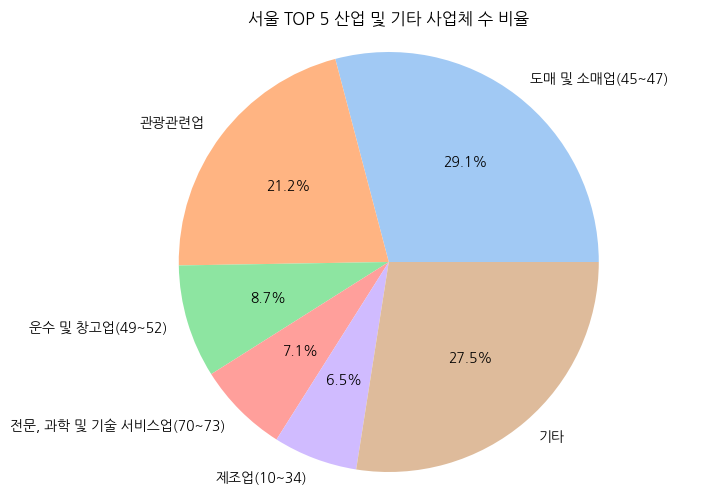

In [18]:
# 데이터프레임에서 '산업별'과 '사업체수(개)' 열 선택
data_2_1 = se[['산업별', '사업체수(개)']]

# '사업체수(개)' 열을 기준으로 내림차순으로 데이터 정렬
sorted_data_2_1 = data_2_1.sort_values(by='사업체수(개)', ascending=False)

# 상위 다섯 개의 산업을 추출하고 나머지 데이터의 합을 계산
top5_2_1 = sorted_data_2_1.head(5)
etc_2_1 = sorted_data_2_1.iloc[5:]

# 나머지 산업의 합을 계산
etc_sum_2_1 = etc_2_1['사업체수(개)'].sum()

# 파이 차트에 사용할 새로운 데이터프레임을 생성
pie_data_2_1 = pd.concat([top5_2_1, pd.DataFrame([[etc_sum_2_1]], columns=['사업체수(개)'], index=['기타'])])

# '산업별' 열의 '기타' 행 값 설정
pie_data_2_1.at['기타', '산업별'] = '기타'

# '산업별' 열에서 레이블 값 설정
labels_2_1 = pie_data_2_1['산업별']

# 파이 차트
plt.figure(figsize=(8, 6))
plt.pie(pie_data_2_1['사업체수(개)'], labels=labels_2_1, autopct='%1.1f%%')
plt.title('서울 TOP 5 산업 및 기타 사업체 수 비율')
plt.axis('equal')
plt.show()

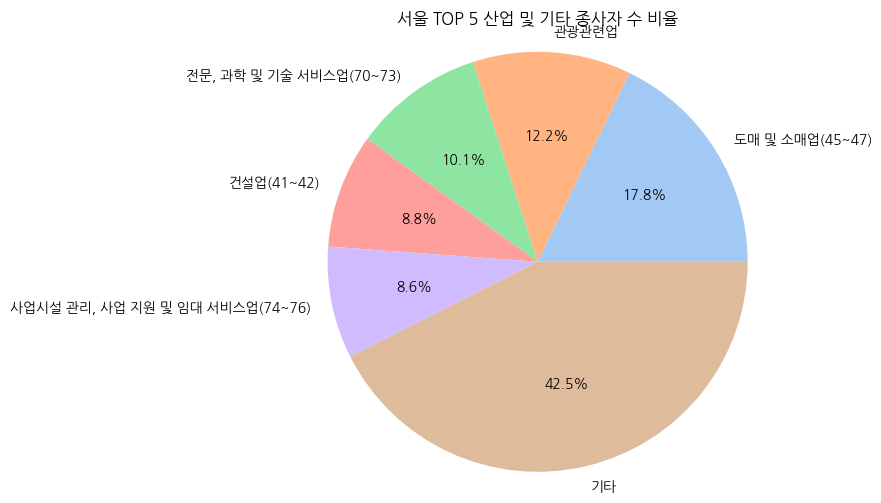

In [19]:
# 데이터프레임에서 '산업별'과 '종사자수(명)' 열 선택
data_2_2 = se[['산업별', '종사자수(명)']]

# '사업체수(개)' 열을 기준으로 내림차순으로 데이터 정렬
sorted_data_2_2 = data_2_2.sort_values(by='종사자수(명)', ascending=False)

# 상위 다섯 개의 산업을 추출하고 나머지 데이터의 합을 계산
top5_2_2 = sorted_data_2_2.head(5)
etc_2_2 = sorted_data_2_2.iloc[5:]

# 나머지 산업의 합을 계산
etc_sum_2_2 = etc_2_2['종사자수(명)'].sum()

# 파이 차트에 사용할 새로운 데이터프레임을 생성
pie_data_2_2 = pd.concat([top5_2_2, pd.DataFrame([[etc_sum_2_2]], columns=['종사자수(명)'], index=['기타'])])

# '산업별' 열의 '기타' 행 값 설정
pie_data_2_2.at['기타', '산업별'] = '기타'

# '산업별' 열에서 레이블 값 설정
labels_2_2 = pie_data_2_2['산업별']

# 파이 차트
plt.figure(figsize=(8, 6))
plt.pie(pie_data_2_2['종사자수(명)'], labels=labels_2_2, autopct='%1.1f%%')
plt.title('서울 TOP 5 산업 및 기타 종사자 수 비율')
plt.axis('equal')
plt.show()

# 제주 산업체

In [20]:
fn_3 = '제주.xlsx'
df_3 = pd.read_excel(filepath + '/' + fn_3)
df_3

,행정구역별,산업별,사업체구분별,2020,2020.1
0,행정구역별,산업별,사업체구분별,사업체수 (개),종사자수 (명)
1,제주,전체 산업,계,94001,318891
2,NaN,NaN,단독사업체,89264,248473
3,NaN,NaN,"본사,본점 등",860,25667
4,NaN,NaN,"공장,지사(점),영업소",3877,44751
...,...,...,...,...,...
75,NaN,NaN,"공장,지사(점),영업소",65,2225
76,NaN,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",계,6778,13614
77,NaN,NaN,단독사업체,6433,11819
78,NaN,NaN,"본사,본점 등",31,581


In [21]:
je=df_3.dropna(subset=['산업별'])
je.drop(['행정구역별','사업체구분별'],axis=1)
je.rename(columns={'2020':'사업체수(개)'},inplace=True)
je.rename(columns={'2020.1':'종사자수(명)'},inplace=True)

In [22]:
je=je.drop([0,1])

In [23]:
je=je.fillna('제주')

In [24]:
# 특정 3개의 행을 합쳐서 '관광관련업'이라는 하나의 행으로 만들고 기존의 데이터 프레임에서 삭제
merge_3 = ['숙박 및 음식점업(55~56)', '예술, 스포츠 및 여가관련 서비스업(90~91)', '협회 및 단체, 수리 및 기타 개인 서비스업(94~96)']
je_filtered = je[je['산업별'].isin(merge_3)]
je_filtered_sum = je_filtered.groupby('행정구역별').sum().reset_index()
je_filtered_sum['산업별'] = '관광관련업'
je = pd.concat([je[~je['산업별'].isin(merge_3)], se_filtered_sum])

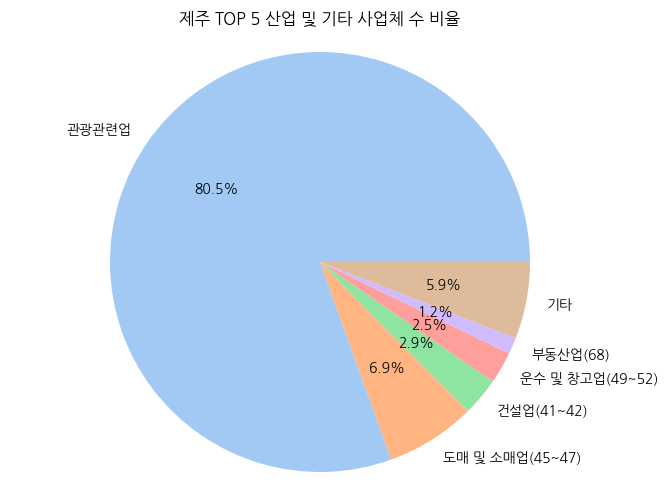

In [25]:
# 데이터프레임에서 '산업별'과 '사업체수(개)' 열 선택
data_3_1 = je[['산업별', '사업체수(개)']]

# '사업체수(개)' 열을 기준으로 내림차순으로 데이터 정렬
sorted_data_3_1 = data_3_1.sort_values(by='사업체수(개)', ascending=False)

# 상위 다섯 개의 산업을 추출하고 나머지 데이터의 합을 계산
top5_3_1 = sorted_data_3_1.head(5)
etc_3_1 = sorted_data_3_1.iloc[5:]

# 나머지 산업의 합을 계산
etc_sum_3_1 = etc_3_1['사업체수(개)'].sum()

# 파이 차트에 사용할 새로운 데이터프레임을 생성
pie_data_3_1 = pd.concat([top5_3_1, pd.DataFrame([[etc_sum_3_1]], columns=['사업체수(개)'], index=['기타'])])

# '산업별' 열의 '기타' 행 값 설정
pie_data_3_1.at['기타', '산업별'] = '기타'

# '산업별' 열에서 레이블 값 설정
labels_3_1 = pie_data_3_1['산업별']

# 파이 차트
plt.figure(figsize=(8, 6))
plt.pie(pie_data_3_1['사업체수(개)'], labels=labels_3_1, autopct='%1.1f%%')
plt.title('제주 TOP 5 산업 및 기타 사업체 수 비율')
plt.axis('equal')
plt.show()

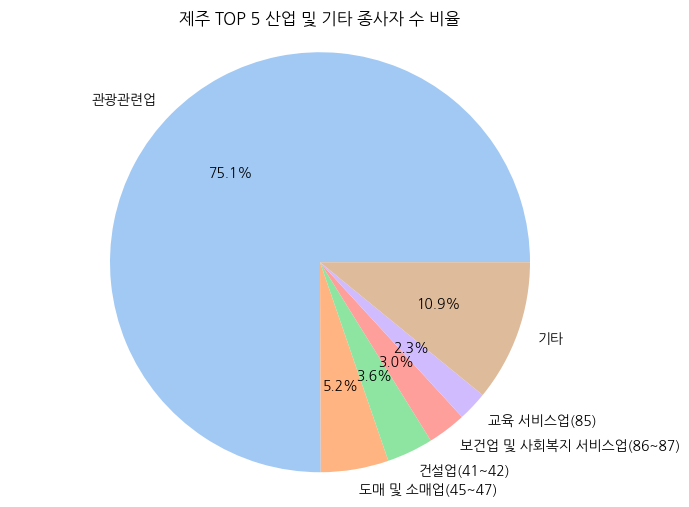

In [26]:
# 데이터프레임에서 '산업별'과 '종사자수(명)' 열 선택
data_3_2 = je[['산업별', '종사자수(명)']]

# '사업체수(개)' 열을 기준으로 내림차순으로 데이터 정렬
sorted_data_3_2 = data_3_2.sort_values(by='종사자수(명)', ascending=False)

# 상위 다섯 개의 산업을 추출하고 나머지 데이터의 합을 계산
top5_3_2 = sorted_data_3_2.head(5)
etc_3_2 = sorted_data_3_2.iloc[5:]

# 나머지 산업의 합을 계산
etc_sum_3_2 = etc_3_2['종사자수(명)'].sum()

# 파이 차트에 사용할 새로운 데이터프레임을 생성
pie_data_3_2 = pd.concat([top5_3_2, pd.DataFrame([[etc_sum_3_2]], columns=['종사자수(명)'], index=['기타'])])

# '산업별' 열의 '기타' 행 값 설정
pie_data_3_2.at['기타', '산업별'] = '기타'

# '산업별' 열에서 레이블 값 설정
labels_3_2 = pie_data_3_2['산업별']

# 파이 차트
plt.figure(figsize=(8, 6))
plt.pie(pie_data_3_2['종사자수(명)'], labels=labels_3_2, autopct='%1.1f%%')
plt.title('제주 TOP 5 산업 및 기타 종사자 수 비율')
plt.axis('equal')
plt.show()